In [ ]:
import sys
import re, numpy as np, pandas as pd
from pprint import pprint

import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

In [ ]:
# import pandas as pd

# documents = pd.read_pickle(r'documents.pkl')
# id2word = pd.read_pickle(r'id2word.pkl')
# corpus = pd.read_pickle(r'corpus.pkl')
# lda_model = pd.read_pickle(r'lda_model.pkl')
# data_ready = pd.read_pickle(r'data_ready.pkl')

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=50,
                                           per_word_topics=True)

print(lda_model.print_topics())

[(0, '0.433*"knee" + 0.263*"surgery" + 0.123*"iron" + 0.075*"anemia" + 0.023*"joint" + 0.018*"injection" + 0.009*"tylenol" + 0.000*"daughter" + 0.000*"artery" + 0.000*"risk"'), (1, '0.172*"insulin" + 0.139*"unit" + 0.137*"diabetes" + 0.113*"type" + 0.058*"complication" + 0.057*"direct" + 0.049*"sugar" + 0.044*"current" + 0.043*"ml" + 0.042*"control"'), (2, '0.054*"internal" + 0.047*"date" + 0.040*"medicine" + 0.040*"current" + 0.038*"medication" + 0.038*"age" + 0.037*"male" + 0.035*"present" + 0.034*"problem" + 0.032*"icd_cm"'), (3, '0.105*"future" + 0.105*"care" + 0.100*"visit" + 0.095*"primary" + 0.094*"follow" + 0.030*"date" + 0.021*"encounter" + 0.017*"present" + 0.017*"unspecified" + 0.015*"stable"'), (4, '0.055*"last" + 0.037*"due" + 0.029*"follow" + 0.021*"weight" + 0.021*"present" + 0.019*"today" + 0.017*"maintenance" + 0.017*"htn" + 0.016*"health" + 0.015*"pain"'), (5, '0.116*"file" + 0.043*"social" + 0.033*"status" + 0.029*"never" + 0.026*"date" + 0.025*"tobacco" + 0.022*"act

In [ ]:
import pickle
with open('/tmarkossian/212900/cati/lda_model.pkl', 'wb') as f:
   pickle.dump(lda_model, f)

In [ ]:
pprint(lda_model.print_topics())

[(0,
  '0.433*"knee" + 0.263*"surgery" + 0.123*"iron" + 0.075*"anemia" + '
  '0.023*"joint" + 0.018*"injection" + 0.009*"tylenol" + 0.000*"daughter" + '
  '0.000*"artery" + 0.000*"risk"'),
 (1,
  '0.172*"insulin" + 0.139*"unit" + 0.137*"diabetes" + 0.113*"type" + '
  '0.058*"complication" + 0.057*"direct" + 0.049*"sugar" + 0.044*"current" + '
  '0.043*"ml" + 0.042*"control"'),
 (2,
  '0.054*"internal" + 0.047*"date" + 0.040*"medicine" + 0.040*"current" + '
  '0.038*"medication" + 0.038*"age" + 0.037*"male" + 0.035*"present" + '
  '0.034*"problem" + 0.032*"icd_cm"'),
 (3,
  '0.105*"future" + 0.105*"care" + 0.100*"visit" + 0.095*"primary" + '
  '0.094*"follow" + 0.030*"date" + 0.021*"encounter" + 0.017*"present" + '
  '0.017*"unspecified" + 0.015*"stable"'),
 (4,
  '0.055*"last" + 0.037*"due" + 0.029*"follow" + 0.021*"weight" + '
  '0.021*"present" + 0.019*"today" + 0.017*"maintenance" + 0.017*"htn" + '
  '0.016*"health" + 0.015*"pain"'),
 (5,
  '0.116*"file" + 0.043*"social" + 0.033*"st

In [ ]:
# Compute Coherence Score
import gensim
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):

    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics,
                                           random_state=100,
                                           iterations=10,
                                           per_word_topics=True)
        model_list.append(lda_model)
        coherencemodel = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
# Take a long time to run. :(
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_ready, start=2, limit=20, step=3)

In [ ]:
import pickle
with open('/tmarkossian/212900/cati/model_list.pkl', 'wb') as f:
   pickle.dump(model_list, f)

In [ ]:
import pickle
with open('/tmarkossian/212900/cati/coherence_values.pkl', 'wb') as f:
   pickle.dump(coherence_values, f)

In [ ]:
ldamodel8 = model_list[2]

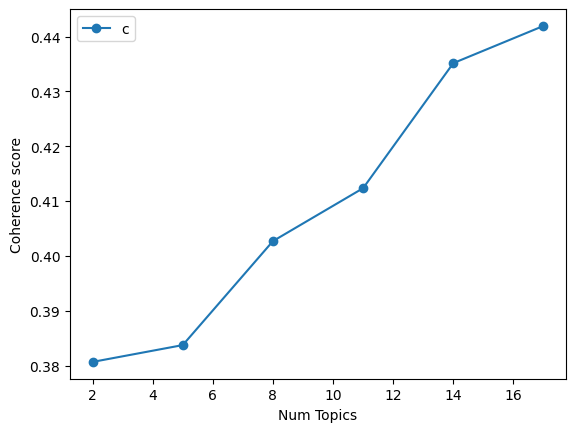

In [ ]:
limit=20; start=2; step=3;
x = range(start, limit, step)
plt.plot(x, coherence_values,"-o")
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3807
Num Topics = 5  has Coherence Value of 0.3837
Num Topics = 8  has Coherence Value of 0.4027
Num Topics = 11  has Coherence Value of 0.4124
Num Topics = 14  has Coherence Value of 0.4352
Num Topics = 17  has Coherence Value of 0.4419


In [ ]:
%%capture
def format_topics_sentences(ldamodel=None, corpus=corpus, texts= documents):
    sent_topics_df = pd.DataFrame()

    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)

    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel8, corpus=corpus, texts=data_ready)

df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

In [ ]:
df_dominant_topic.head(10)

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0               0              0.6184   
1            1               0              0.7126   
2            2               0              0.8343   
3            3               1              0.5839   
4            4               3              0.7872   
5            5               2              0.8205   
6            6               5              0.2750   
7            7               4              0.2963   
8            8               4              0.5017   
9            9               3              0.6443   

                                            Keywords  \
0  daily, pain, continue, medication, mouth, curr...   
1  daily, pain, continue, medication, mouth, curr...   
2  daily, pain, continue, medication, mouth, curr...   
3  daily, pain, medication, mouth, day, current, ...   
4  follow, visit, primary, care, future, stable, ...   
5  file, social, date, status, normal, medication...   
6  daily, date, value, lab, component, pain, resu...   
7  daily, pain, current, medication, breast, year...   
8  daily, pain, current, medication, breast, year...   
9  follow, visit, primary, care, future, stable, ...   

                                                Text  
0  [telehealth, video, visit, conduct, encounter,...  
1  [mouth, tab, late, afternoon, refresh_refresh,...  
2  [lorraine_pet, female, cad, hyperlipidemia, ck...  
3  [color, vision, screen, pass, tdap, non, drug,...  
4  [age, date, visit, chief, complaint, present, ...  
5  [cleo_nicholson, age, encounter, date, subject...  
6  [age, encounter, date, subjective, chief, comp...  
7  [supervise, general, medicine, attend, note, g...  
8  [female, fu, duscuss, med, lose, purse, pill, ...  
9  [age, date, visit, chief, complaint, present, ...

In [ ]:
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet,
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)],
                                            axis=0)

sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

sent_topics_sorteddf_mallet.head(10)

Topic_Num  Topic_Perc_Contrib  \
0          0              0.9951   
1          1              0.9648   
2          2              0.9908   
3          3              0.9859   
4          4              0.9879   
5          5              0.9546   
6          6              0.9838   
7          7              0.9948   

                                                                            Keywords  \
0          daily, pain, continue, medication, mouth, current, day, well, feel, visit   
1                 daily, pain, medication, mouth, day, current, week, eye, hour, tab   
2  file, social, date, status, normal, medication, daily, current, medical, activity   
3          follow, visit, primary, care, future, stable, daily, pain, present, month   
4           daily, pain, current, medication, breast, year, day, mouth, visit, month   
5     daily, date, value, lab, component, pain, result, medication, current, disease   
6                 last, due, visit, follow, today, daily, tab, general, pain, weight   
7    negative, deny, result, component, pain, daily, value, normal, medication, date   

                                                                                   Representative Text  
0  [female, htn, hypothyroid, lumbar, stenosis, travel, week, summer, celebration, anniversary, hea...  
1  [abrade, skin, multiple, healing, abrasion, dorsal, hand, sign, infection, full, finger, neurose...  
2  [visit, duane_leonard, date, date, medical, social, past, personal, illness, injury, medical, pa...  
3  [dolores_grantz, age, date, visit, chief, complaint, present, follow, present, illness, follow, ...  
4  [marie_dorcy, female, fu, staph, infection, breast, laryngeal, reflux, thymoma, unit, mpv_fl, di...  
5  [progress, note, encounter, date, robert_johnson, age, male, chronic, disease, management, subje...  
6  [supervise, general, medicine, attend, note, general, discuss, resident, agree, today, ask, resi...  
7  [age, date, visit, chief, complaint, file, present, illness, plt_count, today, medical, unchange...

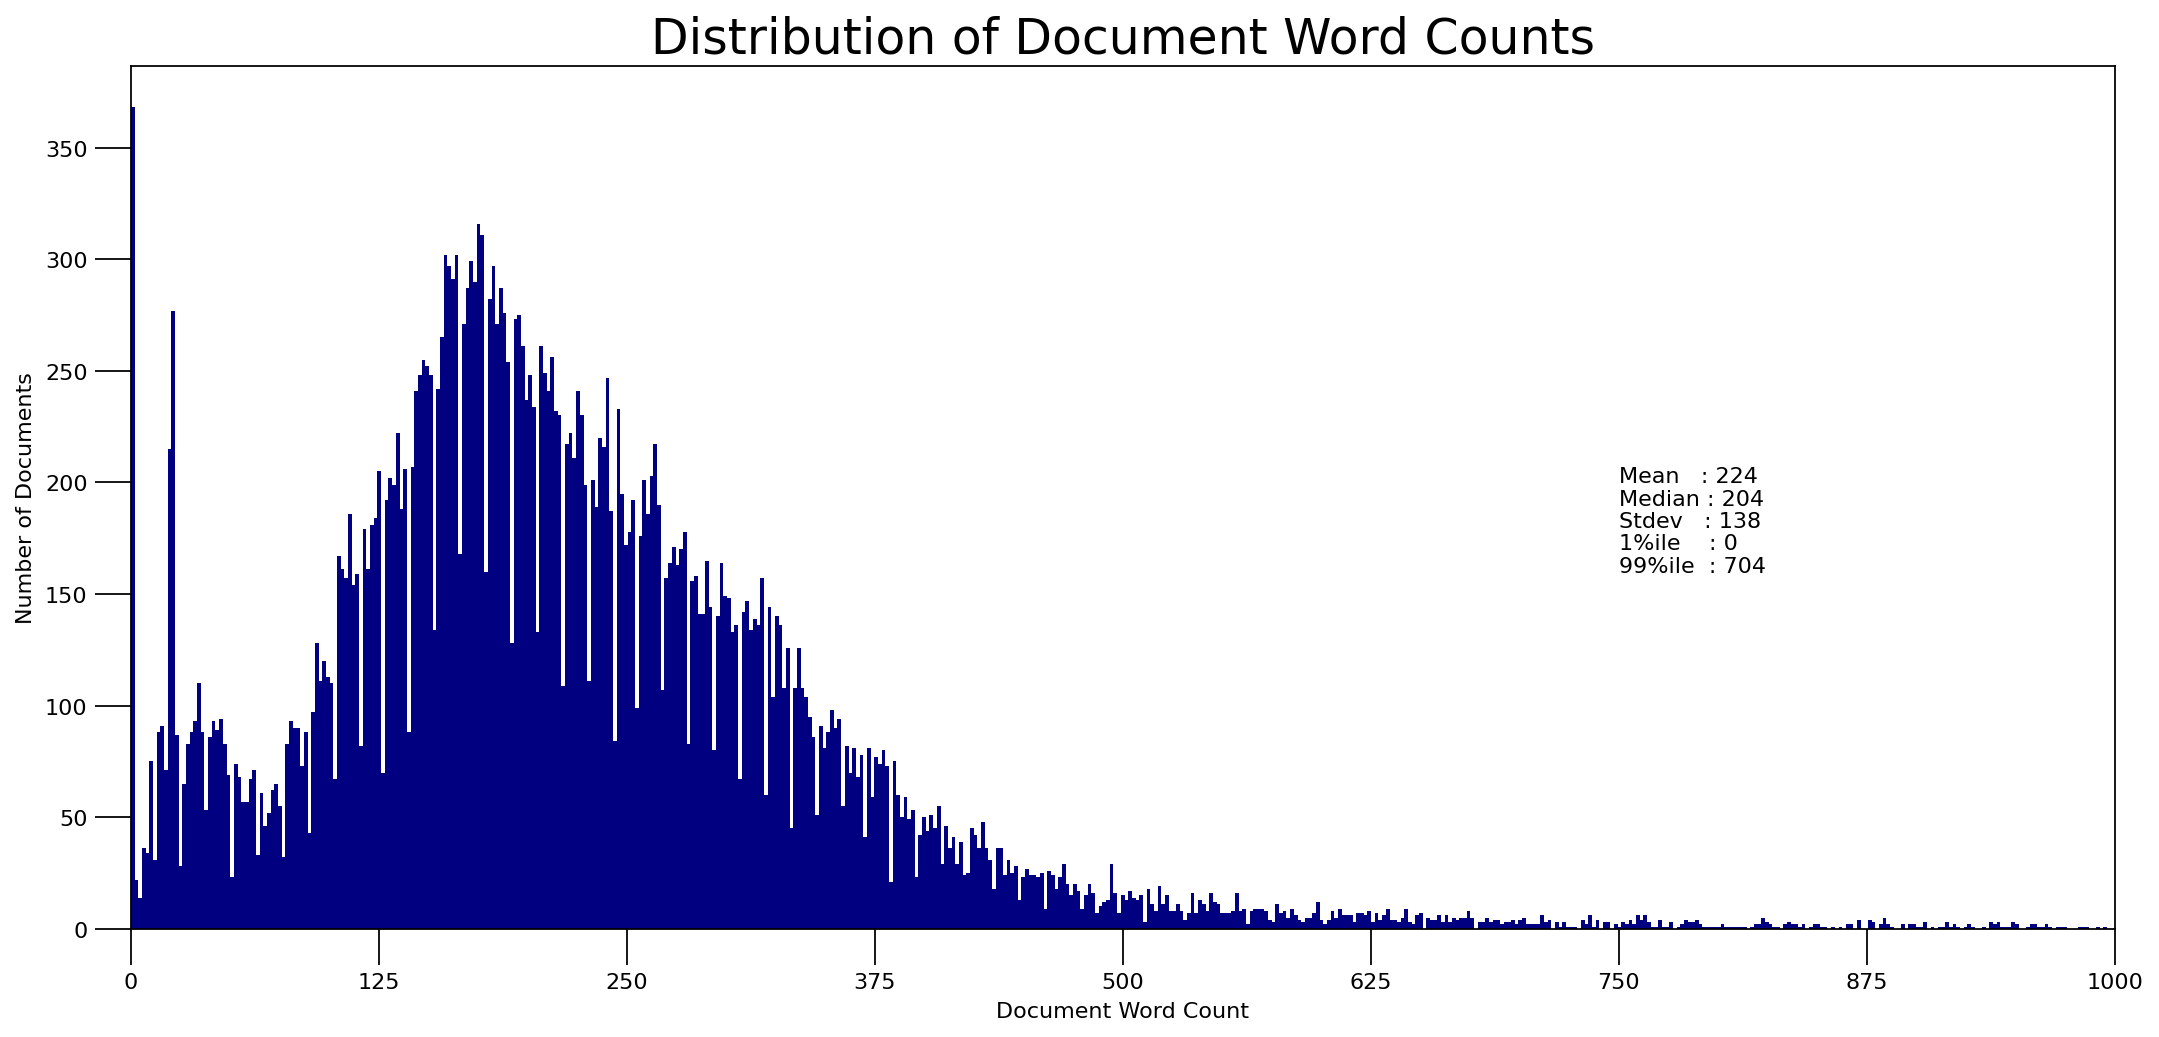

In [ ]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 200, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750, 190, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  180, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  170, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  160, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

<ipython-input-22-23c251f560fa>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
<ipython-input-22-23c251f560fa>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
<ipython-input-22-23c251f560fa>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
<ipython-input-22-23c251f560fa>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(doc_lens, col

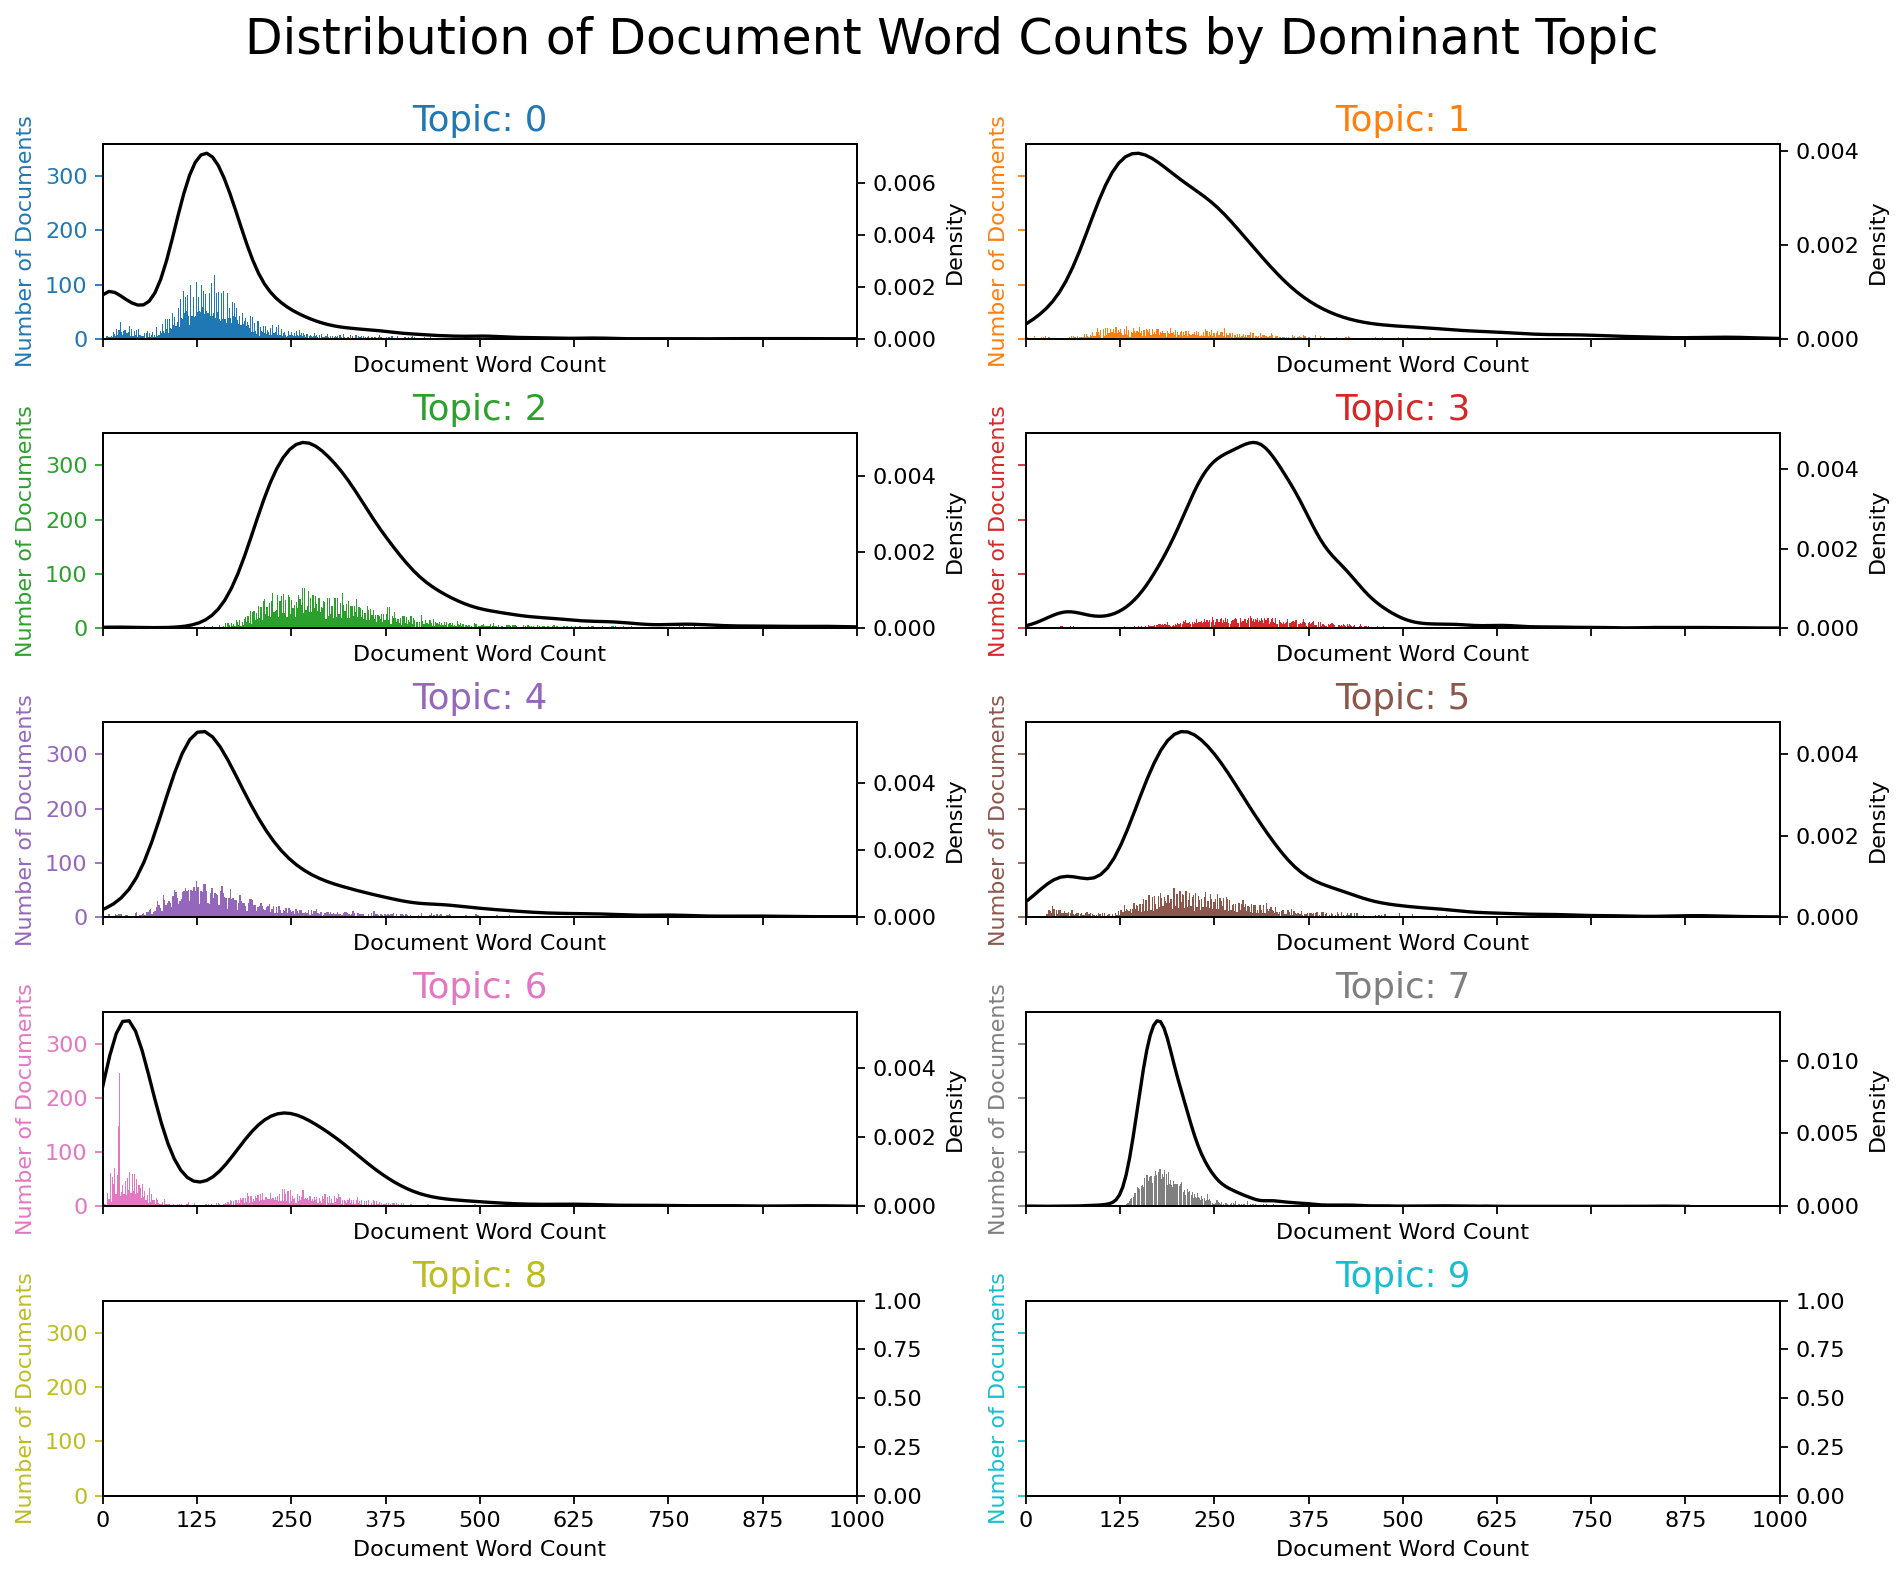

In [ ]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

fig, axes = plt.subplots(5,2,figsize=(12,10), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

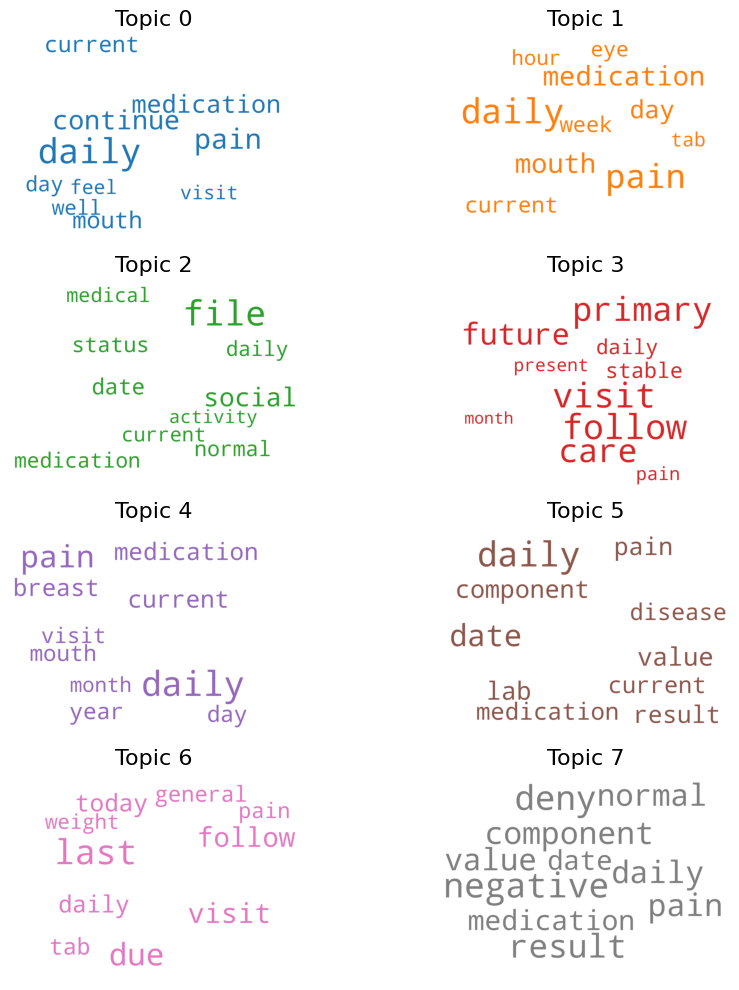

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=15,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel8.show_topics(formatted=False)

fig, axes = plt.subplots(4, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

<ipython-input-24-bc910a19a728>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


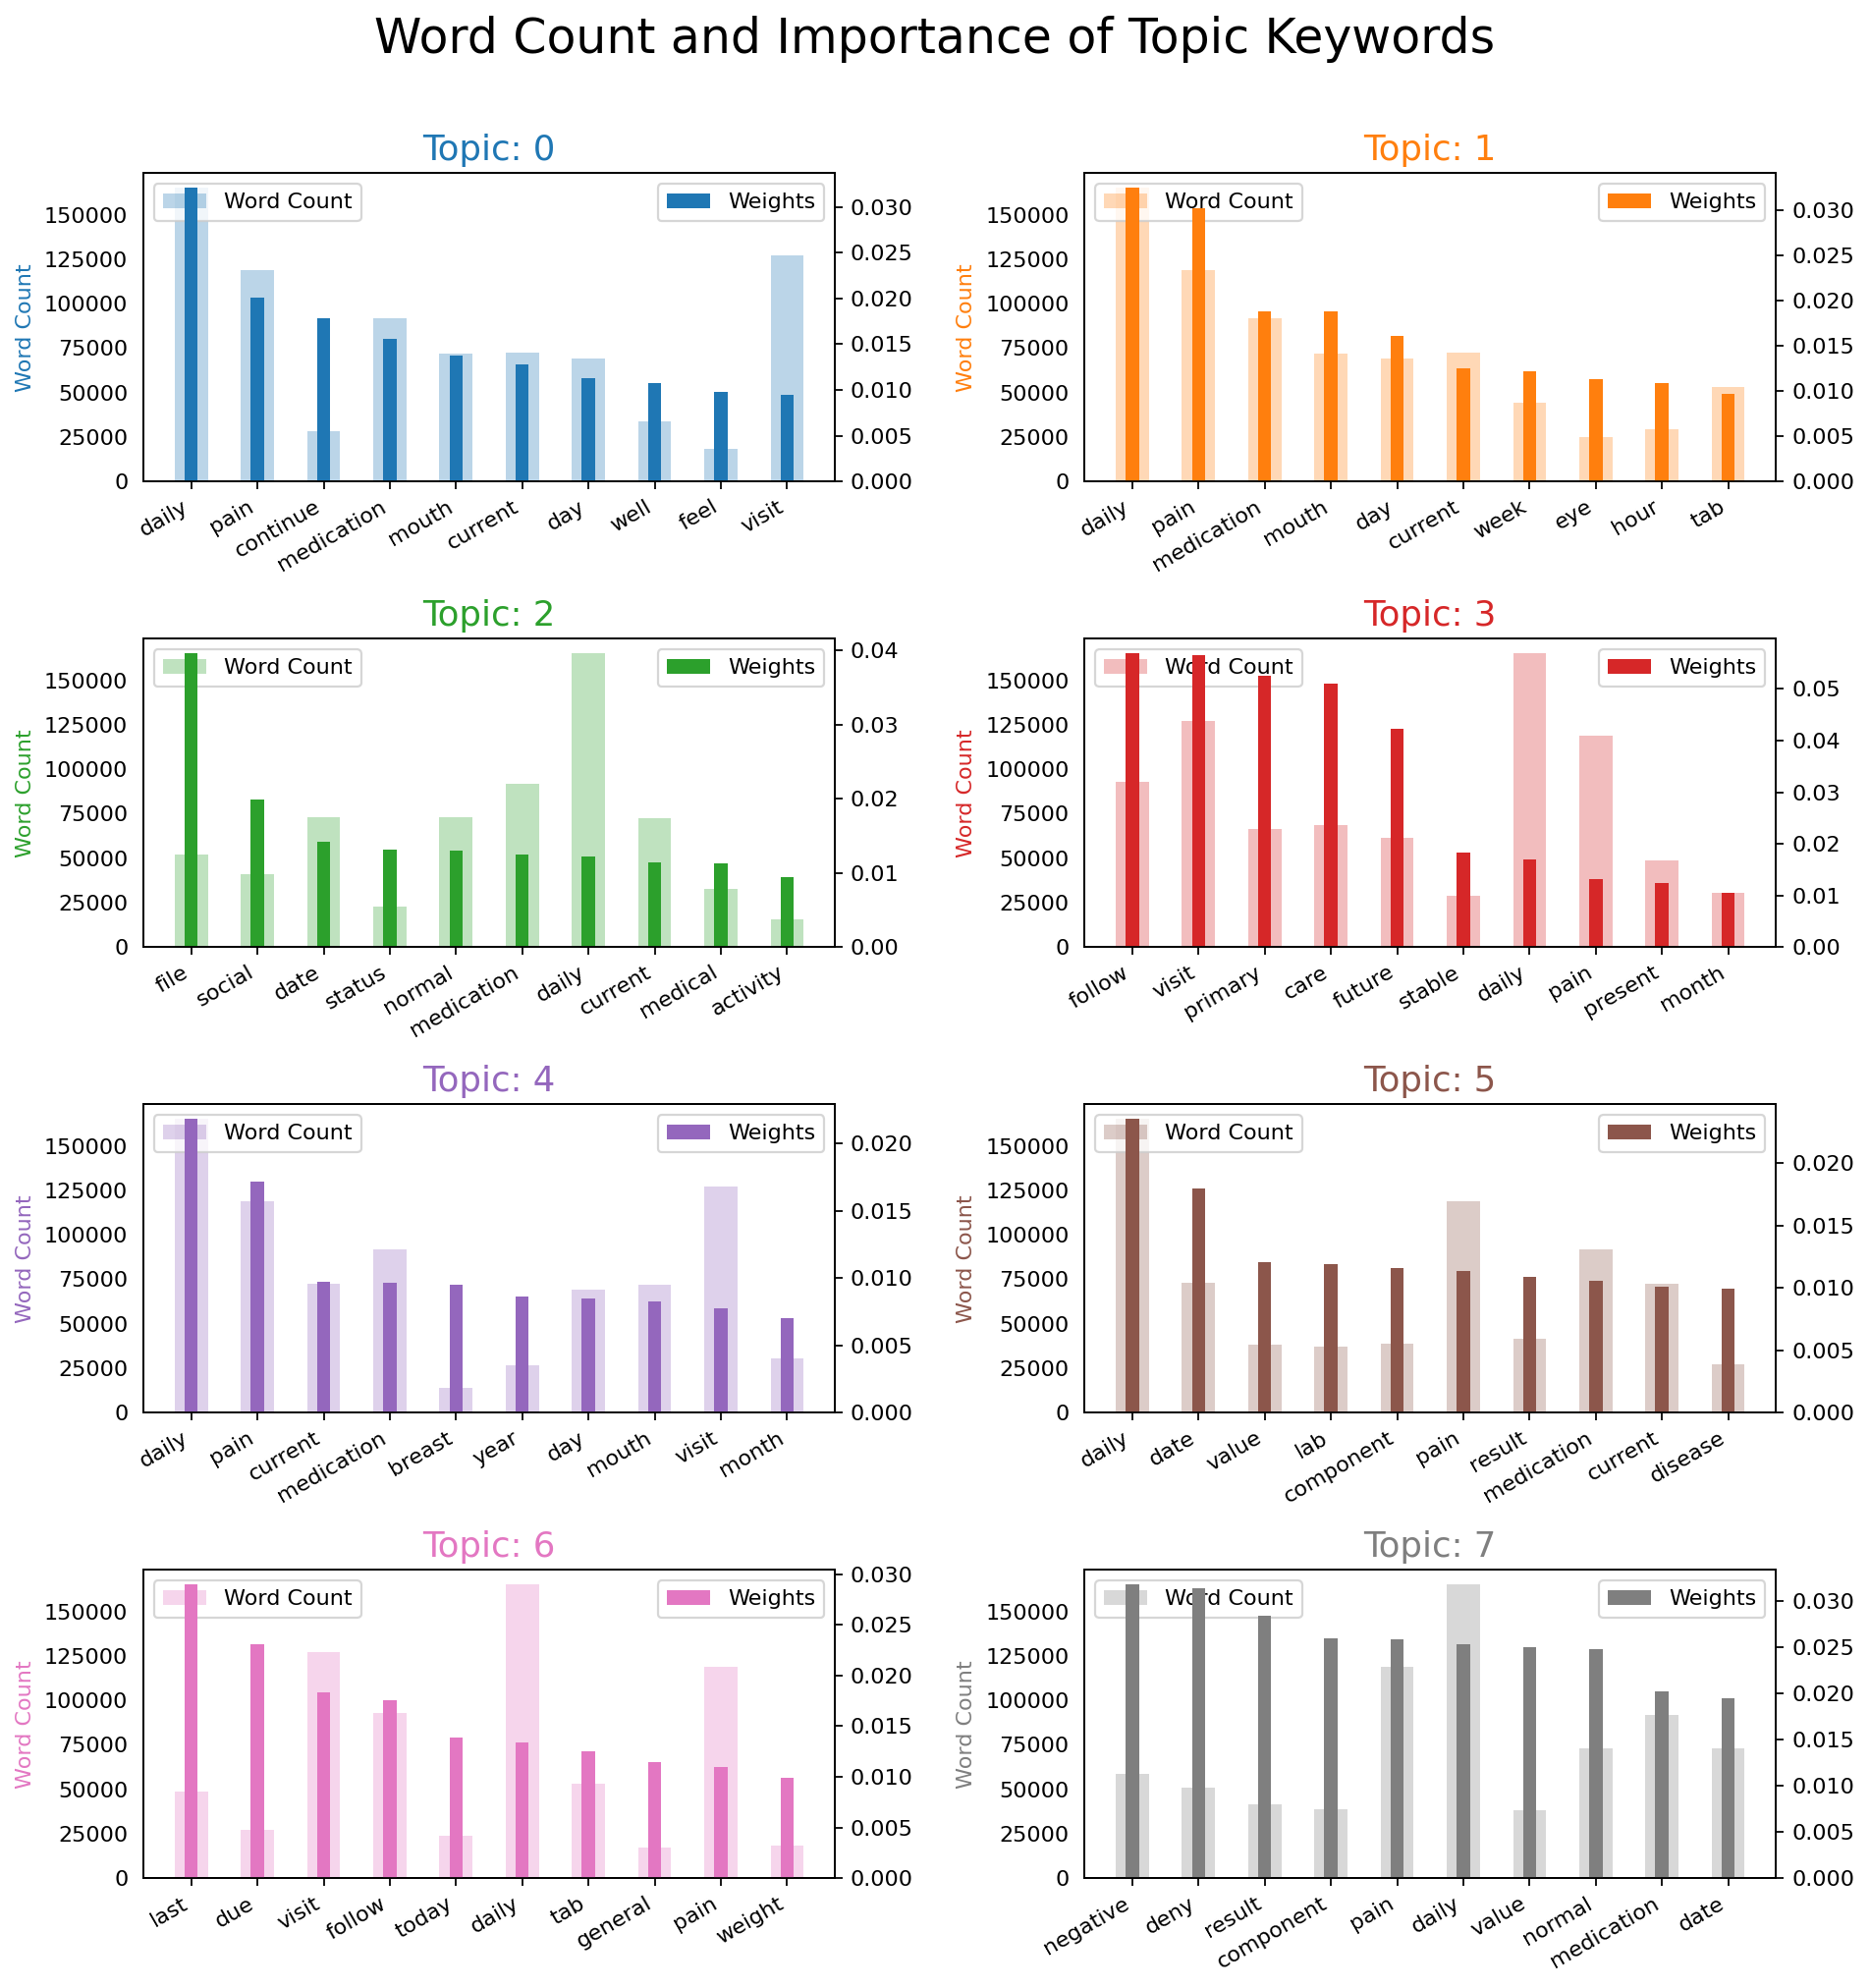

In [ ]:
from collections import Counter
topics = ldamodel8.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])

fig, axes = plt.subplots(4, 2, figsize=(12,12), dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])

    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)
plt.show()

In [ ]:
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=ldamodel8, corpus=corpus, end=-1)
print("dominant topics:", dominant_topics)
print("topic percentages:", topic_percentages[:5])

df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
print("df;", df)
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
print("dominant topic in each doc:", dominant_topic_in_each_doc)
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()
print("df dominant topic in each doc:", df_dominant_topic_in_each_doc)

topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
print("topic weightage by doc:", topic_weightage_by_doc)
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()
print("df topic weightage by doc:", df_topic_weightage_by_doc)

topic_top3words = [(i, topic) for i, topics in ldamodel8.show_topics(formatted=False)
                                 for j, (topic, wt) in enumerate(topics) if j < 3]
print("topic top 3 words:", topic_top3words)
df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
print(df_top3words_stacked)
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
print(df_top3words)
df_top3words.reset_index(level=0,inplace=True)
print(df_top3words)

dominant topics: [(0, 0), (1, 0), (2, 0), (3, 1), (4, 3), (5, 2), (6, 5), (7, 1), (8, 4), (9, 3), (10, 2), (11, 2), (12, 2), (13, 2), (14, 7), (15, 4), (16, 7), (17, 4), (18, 5), (19, 5), (20, 0), (21, 4), (22, 3), (23, 2), (24, 4), (25, 0), (26, 0), (27, 7), (28, 7), (29, 1), (30, 0), (31, 6), (32, 2), (33, 7), (34, 4), (35, 3), (36, 2), (37, 2), (38, 4), (39, 2), (40, 4), (41, 6), (42, 6), (43, 6), (44, 6), (45, 7), (46, 5), (47, 0), (48, 4), (49, 2), (50, 0), (51, 6), (52, 4), (53, 6), (54, 0), (55, 0), (56, 5), (57, 5), (58, 0), (59, 6), (60, 6), (61, 4), (62, 2), (63, 6), (64, 1), (65, 0), (66, 0), (67, 0), (68, 6), (69, 5), (70, 6), (71, 7), (72, 0), (73, 0), (74, 2), (75, 4), (76, 0), (77, 0), (78, 7), (79, 7), (80, 4), (81, 4), (82, 2), (83, 2), (84, 7), (85, 7), (86, 7), (87, 0), (88, 4), (89, 5), (90, 3), (91, 3), (92, 6), (93, 0), (94, 0), (95, 0), (96, 0), (97, 0), (98, 0), (99, 0), (100, 7), (101, 7), (102, 7), (103, 7), (104, 0), (105, 5), (106, 5), (107, 5), (108, 5), (1

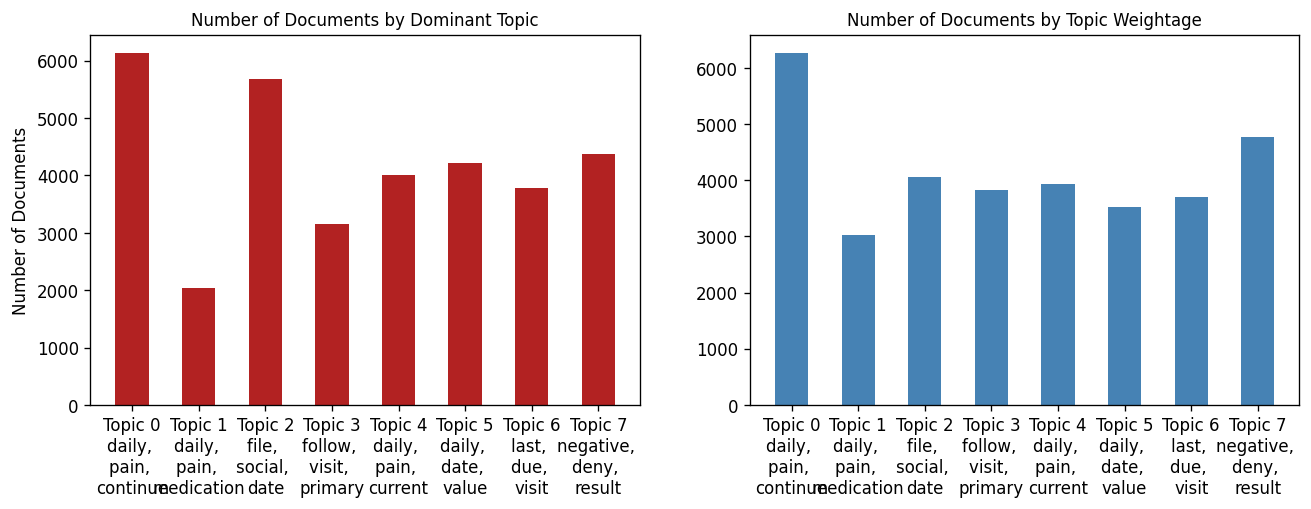

In [ ]:
from matplotlib.ticker import FuncFormatter

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4), dpi=120)


plt.rc('xtick',labelsize=7)
plt.rc('ytick',labelsize=7)

ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')


ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)

ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

In [ ]:
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

topic_weights = []
print("Print LDA model corpus:", ldamodel8[corpus])
for i, row_list in enumerate(ldamodel8[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

print("topic weights:", topic_weights)
print(len(topic_weights[0]))
print(len(topic_weights))


Print LDA model corpus: <gensim.interfaces.TransformedCorpus object at 0x7e8b7f432fb0>
topic weights: [[0.61089534, 0.17158717, 0.14802182, 0.035049524, 0.03157073], [0.70116454, 0.16743879, 0.04765192, 0.045302223, 0.028284976], [0.8218765, 0.1465997, 0.0116838515, 0.013701698], [0.10233097, 0.5877996, 0.16887517, 0.11180008, 0.010404118], [0.0151872365, 0.07414316, 0.7851853, 0.040146895, 0.022931391, 0.01563795, 0.043790773], [0.051144507, 0.8165706, 0.038257543, 0.03763466, 0.012064686, 0.04054605], [0.20511107, 0.046554916, 0.25214317, 0.12068656, 0.28629217, 0.07313173], [0.049056094, 0.27661017, 0.012497485, 0.04432473, 0.27641302, 0.18524833, 0.14652576], [0.06545648, 0.18762979, 0.5087014, 0.14422868, 0.07500679], [0.1243577, 0.055351257, 0.6478056, 0.02838859, 0.13819616], [0.7319184, 0.13789617, 0.028356545, 0.017182346, 0.039806437, 0.03398412], [0.15554348, 0.5284569, 0.18966289, 0.05006849, 0.06319797], [0.14670485, 0.4429131, 0.21123691, 0.09546167, 0.08723797], [0.14549

In [ ]:
arr = pd.DataFrame(topic_weights).fillna(0).values
print(arr.shape)
print("Array of topic weights:", arr)

arr = arr[np.amax(arr, axis=1) > 0.35]
print(arr.shape)

topic_num = np.argmax(arr, axis=1)
print("topic num:", topic_num)


(33412, 8)
Array of topic weights: [[0.61089534 0.17158717 0.14802182 ... 0.         0.         0.        ]
 [0.70116454 0.16743879 0.04765192 ... 0.         0.         0.        ]
 [0.82187653 0.1465997  0.01168385 ... 0.         0.         0.        ]
 ...
 [0.24263495 0.15806207 0.05234699 ... 0.11720215 0.02232883 0.        ]
 [0.84483707 0.0789611  0.01888779 ... 0.         0.         0.        ]
 [0.02011892 0.01502461 0.63616425 ... 0.04893212 0.1620409  0.        ]]
(30123, 8)
topic num: [0 0 0 ... 4 0 2]


In [ ]:
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

In [ ]:
output_notebook()
n_topics = 10
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics),
              width=900, height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])

show(plot)